In [10]:
from sklearn.datasets import load_digits
import numpy as np

ld=load_digits()
ld.target



array([0, 1, 2, ..., 8, 9, 8])

In [4]:
ld.target.shape

(1797,)

In [5]:
ld.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
ld.data.shape

(1797, 64)

In [7]:
y=(ld.target==9)
y

array([False, False, False, ..., False,  True, False])

In [12]:

a, b = np.unique(y, return_counts=True)
a


array([False,  True])

In [13]:
b

array([1617,  180])

In [17]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = tts(ld.data,y,stratify=y, random_state=33)
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train,y_train)
score=logreg.score(X_test,y_test)
score


0.9888888888888889

In [21]:
pl=logreg.predict(X_test)
pl

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,

In [22]:
y_test

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,

In [27]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pl) 
confusion

array([[402,   3],
       [  2,  43]])

In [28]:
y_test.shape

(450,)

In [29]:
a, b = np.unique(y_test, return_counts=True)
a

array([False,  True])

In [30]:
b

array([405,  45])

In [32]:
from sklearn.metrics import precision_score
precision=precision_score(y_test, pl)
precision

0.9347826086956522

In [33]:
from sklearn.metrics import recall_score
recall=recall_score(y_test, pl)
recall

0.9555555555555556

In [34]:
from sklearn.metrics import f1_score
f1=f1_score(y_test, pl)
f1

0.945054945054945

In [36]:
from sklearn.metrics import classification_report
cr=classification_report(y_test, pl)
print(cr)

              precision    recall  f1-score   support

       False       1.00      0.99      0.99       405
        True       0.93      0.96      0.95        45

    accuracy                           0.99       450
   macro avg       0.96      0.97      0.97       450
weighted avg       0.99      0.99      0.99       450



In [37]:
df=logreg.decision_function(X_test)
df

array([-17.44390987,  -7.00708581, -20.0082024 , -24.27824554,
       -15.36709433, -21.59167793, -12.63237995,  18.1775495 ,
       -18.78019261,  -9.96650311,  -5.5775081 , -29.25410815,
       -13.18063905, -15.13490882, -16.02159098, -24.95380759,
       -53.20401321, -17.6916154 , -48.82404557, -35.59773294,
       -28.37291638,  -5.03598816, -31.43962079, -16.39703952,
       -33.49329612,  -7.76030589, -38.83430432, -67.80464802,
       -27.79162449,  -9.89342095, -14.44338617,  -5.66760983,
         7.00227663, -36.64724845, -15.17818754, -39.72621619,
       -26.21419811, -35.19918241,  -0.29370332, -18.98786519,
       -20.86861731, -47.64931435, -36.23257898, -19.59602034,
       -11.63388662, -14.44831205,  -5.93169115,  -9.9603987 ,
        13.64491376, -24.98926909, -31.83655175, -48.58099288,
        -8.54648261,  -4.30287525,  -4.39706942, -35.55505526,
        -8.99448197, -67.02482991, -22.38546031, -21.68417307,
        15.81383957, -14.25648349, -25.11766111, -17.12

In [38]:
df.shape

(450,)

In [39]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,df)


In [40]:
precision

array([0.8490566 , 0.84615385, 0.8627451 , 0.88      , 0.87755102,
       0.89583333, 0.91489362, 0.93478261, 0.93333333, 0.95454545,
       0.95348837, 0.95238095, 0.95121951, 0.975     , 0.97435897,
       0.97368421, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

In [41]:
recall

array([1.        , 0.97777778, 0.97777778, 0.97777778, 0.95555556,
       0.95555556, 0.95555556, 0.95555556, 0.93333333, 0.93333333,
       0.91111111, 0.88888889, 0.86666667, 0.86666667, 0.84444444,
       0.82222222, 0.82222222, 0.8       , 0.77777778, 0.75555556,
       0.73333333, 0.71111111, 0.68888889, 0.66666667, 0.64444444,
       0.62222222, 0.6       , 0.57777778, 0.55555556, 0.53333333,
       0.51111111, 0.48888889, 0.46666667, 0.44444444, 0.42222222,
       0.4       , 0.37777778, 0.35555556, 0.33333333, 0.31111111,
       0.28888889, 0.26666667, 0.24444444, 0.22222222, 0.2       ,
       0.17777778, 0.15555556, 0.13333333, 0.11111111, 0.08888889,
       0.06666667, 0.04444444, 0.02222222, 0.        ])

In [55]:
recall.shape

(54,)

In [42]:
thresholds

array([-1.46054228, -1.11150599, -1.09914424, -0.40802518, -0.29790471,
       -0.29370332, -0.10542644,  0.81878473,  1.8622498 ,  2.11336374,
        2.24217851,  3.09893582,  3.84311105,  4.20988735,  5.20334634,
        5.21207252,  5.28748656,  5.31817529,  7.00227663,  7.17318599,
        8.26506294,  8.78991418,  8.86722316,  9.09861906,  9.20407012,
        9.54776026,  9.71923871,  9.94775122,  9.9663767 , 10.20172287,
       10.26612454, 10.93103604, 11.05853509, 11.4229696 , 11.76661243,
       12.23493747, 13.04477524, 13.24902256, 13.64491376, 13.85529074,
       13.99079276, 14.32721731, 15.08174965, 15.38808528, 15.81383957,
       15.99704763, 16.01976294, 16.31604611, 16.64519042, 17.047477  ,
       17.87809102, 18.1775495 , 18.22823114])

In [54]:
thresholds.shape

(14,)

Text(0, 0.5, 'Recall')

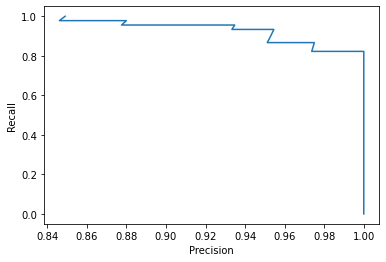

In [46]:
import matplotlib.pyplot as plt
plt.plot(precision, recall)
plt.xlabel("Precision")
plt.ylabel("Recall")

In [47]:
from sklearn.metrics import average_precision_score
aps= average_precision_score(y_test,df)
aps

0.98830251035217

In [48]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds= roc_curve(y_test,df)

In [49]:
fpr

array([0.        , 0.        , 0.        , 0.00246914, 0.00246914,
       0.00493827, 0.00493827, 0.00740741, 0.00740741, 0.01481481,
       0.01481481, 0.01975309, 0.01975309, 1.        ])

In [50]:
fpr.shape

(14,)

In [51]:
tpr

array([0.        , 0.02222222, 0.82222222, 0.82222222, 0.86666667,
       0.86666667, 0.93333333, 0.93333333, 0.95555556, 0.95555556,
       0.97777778, 0.97777778, 1.        , 1.        ])

In [52]:
tpr.shape

(14,)

In [56]:
thresholds.shape

(14,)

Text(0, 0.5, 'tpr')

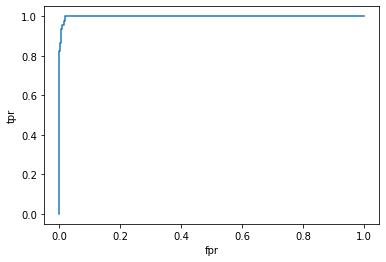

In [53]:
plt.plot(fpr, tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")

In [57]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, df)
auc

0.9986282578875172

In [58]:
pp=logreg.predict_proba(X_test)
pp

array([[9.99999973e-01, 2.65586617e-08],
       [9.99095376e-01, 9.04624293e-04],
       [9.99999998e-01, 2.04431635e-09],
       [1.00000000e+00, 2.85819550e-11],
       [9.99999788e-01, 2.11912044e-07],
       [1.00000000e+00, 4.19617332e-10],
       [9.99996735e-01, 3.26456769e-06],
       [1.27523597e-08, 9.99999987e-01],
       [9.99999993e-01, 6.98016962e-09],
       [9.99953056e-01, 4.69442395e-05],
       [9.96232271e-01, 3.76772865e-03],
       [1.00000000e+00, 1.97288722e-13],
       [9.99998113e-01, 1.88677613e-06],
       [9.99999733e-01, 2.67296023e-07],
       [9.99999890e-01, 1.10131461e-07],
       [1.00000000e+00, 1.45445089e-11],
       [1.00000000e+00, 7.83052079e-24],
       [9.99999979e-01, 2.07314199e-08],
       [1.00000000e+00, 6.25153152e-22],
       [1.00000000e+00, 3.46817509e-16],
       [1.00000000e+00, 4.76210516e-13],
       [9.93542202e-01, 6.45779791e-03],
       [1.00000000e+00, 2.21792153e-14],
       [9.99999924e-01, 7.56582313e-08],
       [1.000000

In [59]:
pp.shape

(450, 2)

In [60]:
pp[:,1]

array([2.65586617e-08, 9.04624293e-04, 2.04431635e-09, 2.85819550e-11,
       2.11912044e-07, 4.19617332e-10, 3.26456769e-06, 9.99999987e-01,
       6.98016962e-09, 4.69442395e-05, 3.76772865e-03, 1.97288722e-13,
       1.88677613e-06, 2.67296023e-07, 1.10131461e-07, 1.45445089e-11,
       7.83052079e-24, 2.07314199e-08, 6.25153152e-22, 3.46817509e-16,
       4.76210516e-13, 6.45779791e-03, 2.21792153e-14, 7.56582313e-08,
       2.84476447e-15, 4.26144477e-04, 1.36293746e-17, 3.57121105e-30,
       8.51629781e-13, 5.05033212e-05, 5.33724152e-07, 3.44421253e-03,
       9.99091019e-01, 1.21423352e-16, 2.55974554e-07, 5.58629055e-18,
       4.12399769e-12, 5.16641529e-16, 4.27097476e-01, 5.67119944e-09,
       8.64718312e-10, 2.02379123e-21, 1.83819205e-16, 3.08714124e-09,
       8.86060528e-06, 5.31101555e-07, 2.64696488e-03, 4.72316694e-05,
       9.99998814e-01, 1.40377767e-11, 1.49128707e-14, 7.97155171e-22,
       1.94189355e-04, 1.33489954e-02, 1.21635974e-02, 3.61939263e-16,
      

In [61]:
pp[:,1].shape

(450,)

Text(0, 0.5, 'tpr')

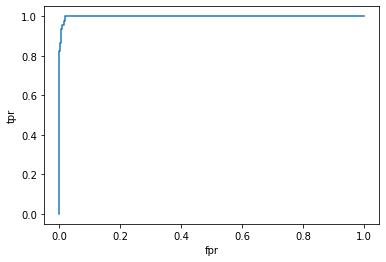

In [62]:
fpr, tpr, thresholds= roc_curve(y_test,pp[:,1])
plt.plot(fpr, tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")

In [63]:
auc = roc_auc_score(y_test,pp[:,1])
auc

0.9986282578875172